**Bike Sharing Demand Prediction**

# Objective of the Project:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Objective of this project is to correctly predict Bike to be rented in differnt time periods,differnt climatic conditions in Seoul City.
Rental prediction model can be done by using differnt machine learning Regression algorithms.
This project aims to correctly predict bike demand in near future so that we can make necessary arrangemets beforehand.


By employing exploratory data analysis (EDA) and robust machine learning regression algorithms,
we will unveil hidden insights in customer behavior, enabling us to target campaigns with laser-sharp precision.
This translates to higher engagement, deeper customer relationships, and optimized marketing ROI.

About the dataset

Link to the dataset: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


Date : year-month-day


Rented Bike count - Count of bikes rented at each hour


Hour - Hour of he day(0-23)


Temperature-Temperature in Celsius


Humidity - Humidity Measure


Windspeed - Windspeed (m/s)


Visibility - visibility Measure


Dew point temperature - Dew point temperature in Celsius


Solar radiation - Solar radiation MJ/m2


Rainfall - Rainfall mm


Snowfall - Snowfall  cm


Seasons - Winter, Spring, Summer, Autumn


Holiday - Holiday/No holiday


Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Data Cleaning and PreProcessing

Basic Cleanup


Clean and preprocess the dataset (handling missing values, data typesin desired format,removing dupliactes,checking for Nan Values etc.).

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

#importing libraries for feature engineering
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing libraries for data modelling
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA

# To supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The initial steps to get an overview of any dataset is to:

1.observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not

2.get information about the number of rows and columns in the dataset

3.find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

4.check the statistical summary of the dataset to get an overview of the numerical columns of the data.

In [69]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

#importing libraries for feature engineering
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing libraries for data modelling
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA

# To supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [70]:
#Loading the Dataset
data=pd.read_csv(r"C:\Users\arsha\Downloads\SeoulBikeData.csv",encoding='unicode_escape')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [71]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [72]:
data.rename(columns={'Rented Bike Count':'Rented Bike Count per Hr',"Temperature(°C)":"Temperature","Humidity(%)":"Humidity","Wind speed (m/s)":"Wind_Speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"Dew Point Temperature","Solar Radiation (MJ/m2)":"Solar Radiation","Snowfall (cm)":"Snowfall",'Rainfall(mm)':"Rainfall",'Functioning Day':'Functioning_Day'},inplace=True)

In [73]:
data.columns

Index(['Date', 'Rented Bike Count per Hr', 'Hour', 'Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [74]:
data.head()

,Date,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [75]:
data.tail()

,Date,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [76]:
#Taking info about dataset to check consistency of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count per Hr  8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature               8760 non-null   float64
 4   Humidity                  8760 non-null   int64  
 5   Wind_Speed                8760 non-null   float64
 6   Visibility                8760 non-null   int64  
 7   Dew Point Temperature     8760 non-null   float64
 8   Solar Radiation           8760 non-null   float64
 9   Rainfall                  8760 non-null   float64
 10  Snowfall                  8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning_Day           8760 non-null   object 
dtypes: float

There are a total of 15 columns and 8760 observations in the dataset.We can see that there are no null values.Datatype of Date,Seaosns,Holiday,Functioning day need to be changed.

In [77]:
Column_List = ['Seasons', 'Holiday', 'Functioning_Day']
for column in Column_List:
    print(data[column].unique())


['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']


In [78]:
data.columns

Index(['Date', 'Rented Bike Count per Hr', 'Hour', 'Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [79]:
data

,Date,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [80]:
#Defining function to convert datatype from object to string

for column in Column_List:
    data[column]=data[column].astype('string')

In [81]:
#Changing Datatype from object to datetime

data['Date']=pd.to_datetime(data['Date'],dayfirst=True,errors='coerce')


In [82]:
data.dtypes

Date                        datetime64[ns]
Rented Bike Count per Hr             int64
Hour                                 int64
Temperature                        float64
Humidity                             int64
Wind_Speed                         float64
Visibility                           int64
Dew Point Temperature              float64
Solar Radiation                    float64
Rainfall                           float64
Snowfall                           float64
Seasons                             string
Holiday                             string
Functioning_Day                     string
dtype: object

In [83]:
#Separating Day,Month,Year and dropping Date column as we dont need it anymore

data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data.drop('Date',axis=1,inplace=True)

In [84]:
data

,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018


In [85]:
data.describe()


,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Month,Day,Year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,15.720548,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,8.796749,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,8.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,16.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,23.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,31.000000,2018.000000


In [86]:
#checking if null value is there or not

data.isnull().sum()

Rented Bike Count per Hr    0
Hour                        0
Temperature                 0
Humidity                    0
Wind_Speed                  0
Visibility                  0
Dew Point Temperature       0
Solar Radiation             0
Rainfall                    0
Snowfall                    0
Seasons                     0
Holiday                     0
Functioning_Day             0
Month                       0
Day                         0
Year                        0
dtype: int64

In [87]:
#checking if any duplicate rows there or not

duplicate_rows=data[data.duplicated()]
duplicate_rows

,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Year


In [88]:
#checking if any NA values there or not

data.isna().sum()

Rented Bike Count per Hr    0
Hour                        0
Temperature                 0
Humidity                    0
Wind_Speed                  0
Visibility                  0
Dew Point Temperature       0
Solar Radiation             0
Rainfall                    0
Snowfall                    0
Seasons                     0
Holiday                     0
Functioning_Day             0
Month                       0
Day                         0
Year                        0
dtype: int64

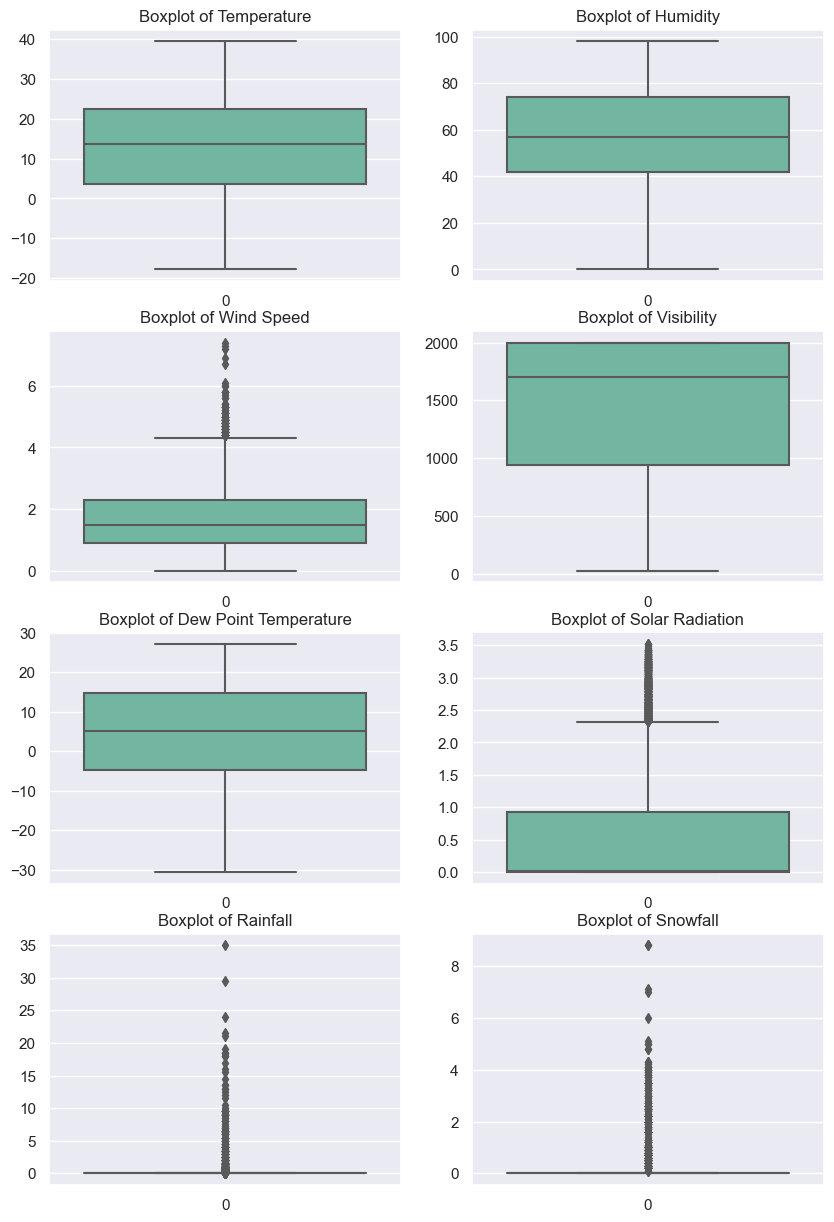

In [89]:
#Boxplot for checking outliers if exists in relevent columns

fig, axs = plt.subplots(4,2, figsize=(10,15))

sns.boxplot(data['Temperature'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Temperature')

sns.boxplot(data['Humidity'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Humidity')


sns.boxplot(data['Wind_Speed'], ax=axs[1,0])
axs[1,0].set_title('Boxplot of Wind Speed')

sns.boxplot(data['Visibility'], ax=axs[1,1])
axs[1,1].set_title('Boxplot of Visibility')

sns.boxplot(data['Dew Point Temperature'], ax=axs[2,0])
axs[2,0].set_title('Boxplot of Dew Point Temperature')

sns.boxplot(data['Solar Radiation'], ax=axs[2,1])
axs[2,1].set_title('Boxplot of Solar Radiation')

sns.boxplot(data['Rainfall'], ax=axs[3,0])
axs[3,0].set_title('Boxplot of Rainfall')

sns.boxplot(data['Snowfall'], ax=axs[3,1])
axs[3,1].set_title('Boxplot of Snowfall')

#customize the style and color palette of the plot
sns.set(style='darkgrid', palette='Set2')

plt.show()


We used boxplot method to determine outliers.We can see outliers in independent features like rainfall,snowfall,wind speed,Solar Radiation.
We need to find how far this outliers are.Are they part of anomaly.

In [90]:
#Finding min max values of below columns

data_min_max=data[['Rainfall','Snowfall','Solar Radiation','Wind_Speed']].agg(['min','max'])
data_min_max

,Rainfall,Snowfall,Solar Radiation,Wind_Speed
min,0.0,0.0,0.00,0.0
max,35.0,8.8,3.52,7.4


In [91]:
#Finding min max values of below columns

data_min_max=data[['Rainfall','Snowfall','Solar Radiation','Wind_Speed']].agg(['min','max'])
data_min_max

,Rainfall,Snowfall,Solar Radiation,Wind_Speed
min,0.0,0.0,0.00,0.0
max,35.0,8.8,3.52,7.4


Min value for all above features is 0,which quiet possible.Also max values arent that big enough.So we will stick to this values.As we dont want to manipulate results.

In [92]:
data.columns

Index(['Rented Bike Count per Hr', 'Hour', 'Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'Month', 'Day', 'Year'],
      dtype='object')

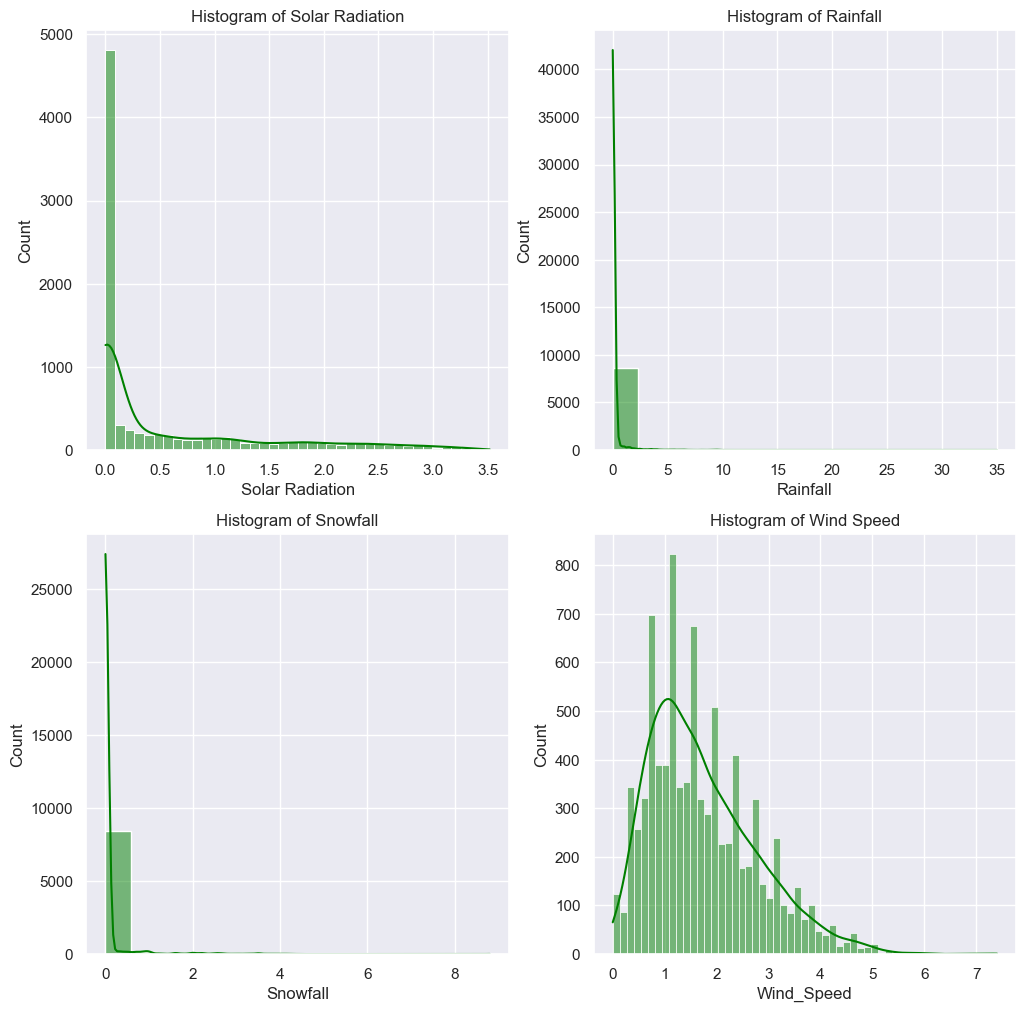

In [93]:
#Histogram of solar radiation

fig, axs = plt.subplots(2,2, figsize=(12,12
                                      ))

sns.histplot(data['Solar Radiation'], kde = True,color='green',ax=axs[0,0])
axs[0,0].set_title('Histogram of Solar Radiation')

sns.histplot(data['Rainfall'], kde = True,color='green',ax=axs[0,1])
axs[0,1].set_title('Histogram of Rainfall')

sns.histplot(data['Snowfall'], kde = True,color='green',ax=axs[1,0])
axs[1,0].set_title('Histogram of Snowfall')

sns.histplot(data['Wind_Speed'], kde = True,color='green',ax=axs[1,1])
axs[1,1].set_title('Histogram of Wind Speed')


plt.show()

In [94]:
# Measuting central tendency and dispersion of all relevant columns

data_median=data.median(numeric_only=True)
data_mean=data.mean(numeric_only=True)
data_mean=data_mean.round(2)
data_standard_deviation=data.std(numeric_only=True)
data_standard_deviation.round(2)
data_variance=data.var(numeric_only=True)
data_variance=data_variance.round(2)


matrix_dict={'Mean':data_mean,'Median':data_median,'Std_Deviation':data_standard_deviation,'Variance':data_variance}

dataframe=pd.concat(matrix_dict,axis=1)
dataframe

,Mean,Median,Std_Deviation,Variance
Rented Bike Count per Hr,704.60,504.50,644.997468,416021.73
Hour,11.50,11.50,6.922582,47.92
Temperature,12.88,13.70,11.944825,142.68
Humidity,58.23,57.00,20.362413,414.63
Wind_Speed,1.72,1.50,1.036300,1.07
Visibility,1436.83,1698.00,608.298712,370027.32
Dew Point Temperature,4.07,5.10,13.060369,170.57
Solar Radiation,0.57,0.01,0.868746,0.75
Rainfall,0.15,0.00,1.128193,1.27
Snowfall,0.08,0.00,0.436746,0.19


<Axes: >

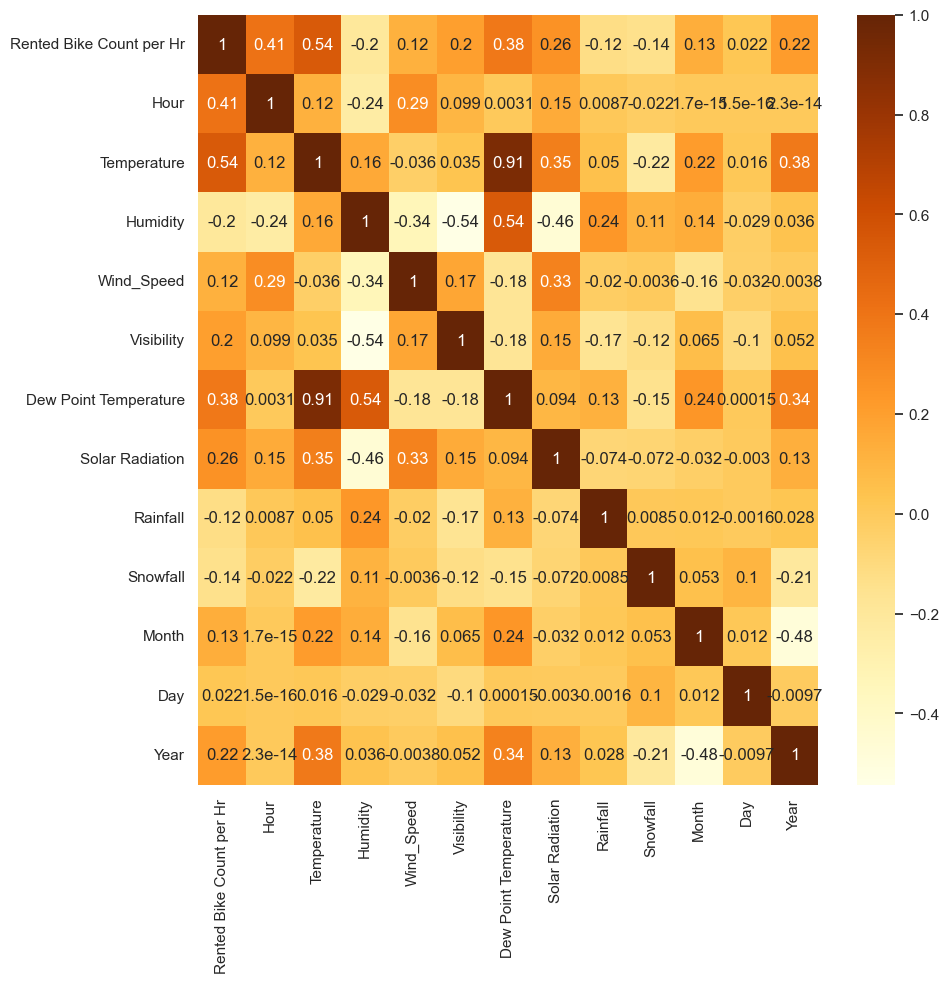

In [95]:
#Correlation matrix

corr=data.corr()

#plotting Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap = 'YlOrBr')

In [96]:
#creating user defined funtion

def create_df(column):
    new_df = data[[column, 'Rented Bike Count per Hr']]
    new_df = new_df.groupby(column).sum().reset_index()
    return new_df


In [97]:
#Making dataframe of bikes rented on diffrent time horizons

Bikes_Per_Hr=create_df('Hour')
Bikes_per_Day=create_df('Day')
Bikes_per_month=create_df('Month')
Bikes_per_Year=create_df('Year')
Bikes_Rented_on_different_Seasons=create_df('Seasons')
Bikes_Rented_on_Holidays=create_df('Holiday')


In [98]:
#Defining function to make barplot of number of bikes rented per hr,day,month and year

def make_barplot(dataframe,x,y):
    plt.figure(figsize = (9,6))
    plt.bar(dataframe[x],dataframe[y],color='#0b215c',edgecolor='black')

    # set the x-tick labels to the values of Hour
    plt.xticks(dataframe[x])

    # add labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Barplot of Rented bikes per {x}')

    return plt.show()

# Exploratory Data Analysis

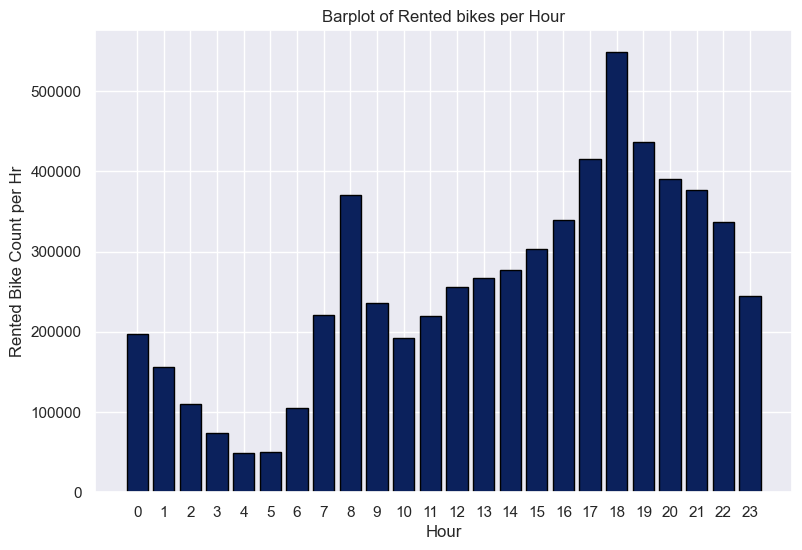

In [99]:
#Plotting Histogram of Hourly rented bikes each hr for both years 2017 and 2018

make_barplot(Bikes_Per_Hr,'Hour','Rented Bike Count per Hr')

Our data reveals a bimodal distribution in bike demand, with a significant surge starting at 10:00 am and peaking at 6:00 pm (18 hours). This suggests a clear opportunity to maximize revenue by concentrating our efforts on optimizing bike availability during this key timeframe, ranging from 8:00 am to 11:00 pm (23 hours).

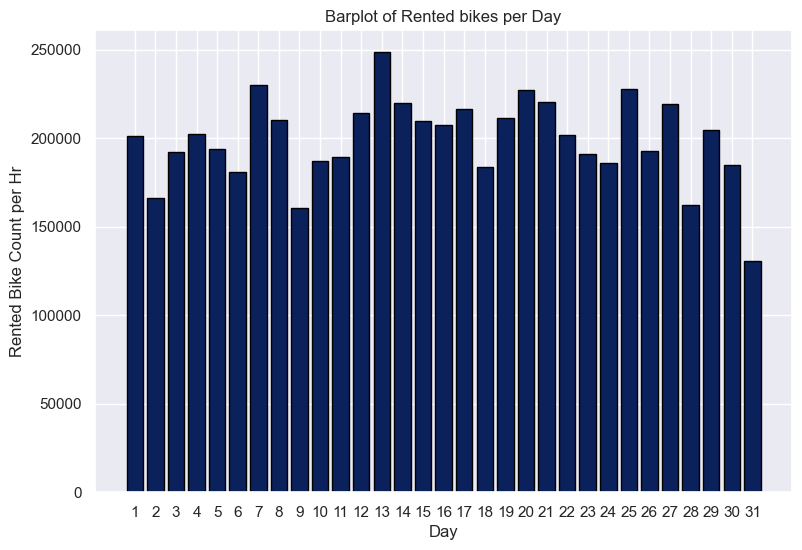

In [100]:
#Plotting Histogram of Hourly rented bikes each day for both years 2017 and 2018

make_barplot(Bikes_per_Day,'Day','Rented Bike Count per Hr')


There are periodical dips after evry 6 days.showing demand for bikes are lower in weekends compared to weekdays.

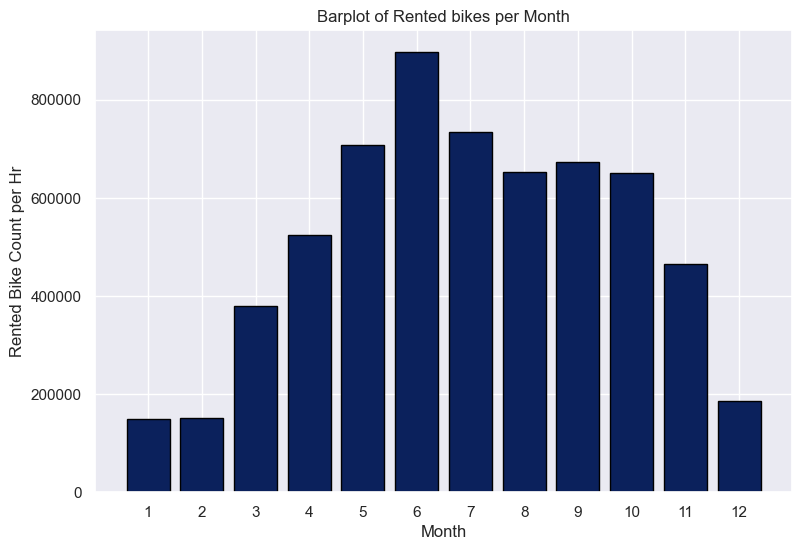

In [101]:
# #Plotting Histogram of Hourly rented bikes each month for both years 2017 and 2018

make_barplot(Bikes_per_month,'Month','Rented Bike Count per Hr')

We observe a distinct seasonality in bike demand, with the lowest utilization during the winter months (December-February). This coincides with the holiday season, suggesting that vacation travel leads to a natural dip in ridership. Demand begins to recover in March, gradually building momentum until it reaches its peak from May to October. This extended period of high demand presents a crucial opportunity for maximizing ridership and revenue.

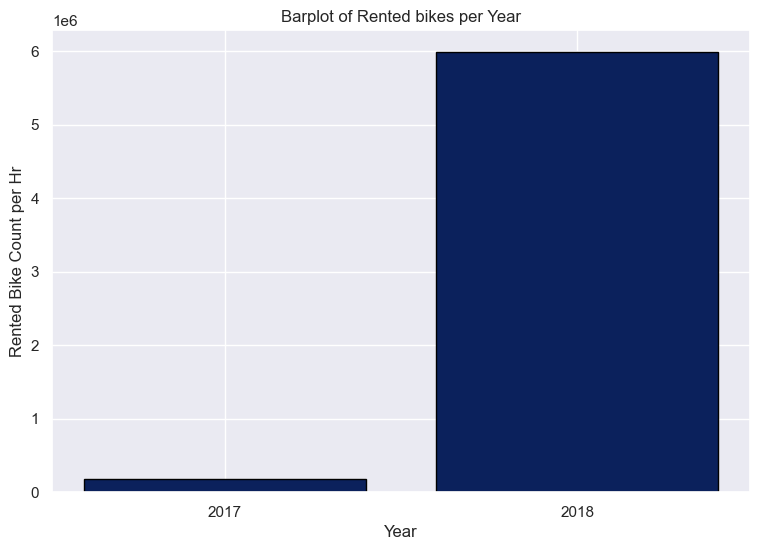

In [102]:
#Plotting Histogram of Hourly rented bikes each year

make_barplot(Bikes_per_Year,'Year','Rented Bike Count per Hr')

In stark contrast to the sluggish demand experienced in 2017, bicycle ridership witnessed a remarkable upswing in 2018.There can e many reasons for this surge.
this may include cheaper bikes,goverenment incentive,Increased price of gasoline and may more.

In [103]:
#Calculating bikes rented on non functionig Days

Bikes_Rented_on_Functioning_Days=data.groupby('Functioning_Day').sum()
Bikes_Rented_on_Functioning_Days=Bikes_Rented_on_Functioning_Days['Rented Bike Count per Hr']
print(Bikes_Rented_on_Functioning_Days)

Functioning_Day
No           0
Yes    6172314
Name: Rented Bike Count per Hr, dtype: int64


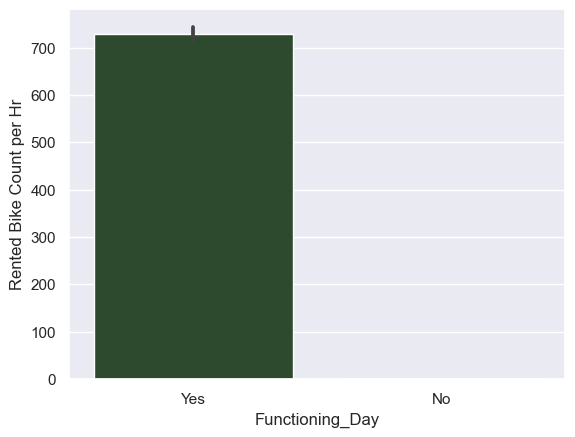

In [104]:
#Plotting Barplot of Bikes rented on functioning vs Non Functioning Days

sns.barplot(x = 'Functioning_Day', y = 'Rented Bike Count per Hr', data =data,color='#294f29')
plt.show()

There is no demand for rental bikes in non functioning days.
Folks want to use car or public transport service on non functionig days.
Peope only use bikes for going to workplaces and dont want to use for any other use.

Buisness need to factor in this mindset.and staregise accordingly.
Consider offering diverse bike types (leisure bikes, cargo bikes) and flexible rental packages (multi-day passes, family plans) to cater to a wider range of needs.
Explore collaborations with local attractions, businesses, or event organizers to promote bike rentals as part of leisure activities or errand trips.

In [105]:
data.columns

Index(['Rented Bike Count per Hr', 'Hour', 'Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'Month', 'Day', 'Year'],
      dtype='object')

In [106]:
#Defining function to make barplot of number of bikes rented per hr,day,month and year

def make_histplot(dataframe,x):
    plt.figure(figsize = (9,6))
    sns.histplot(dataframe[x],color='green',kde=True,edgecolor='black')

    # add labels and title
    plt.xlabel(x)
    plt.title(f'Histogram of Bikes rented on differnt {x}')

    return plt.show()

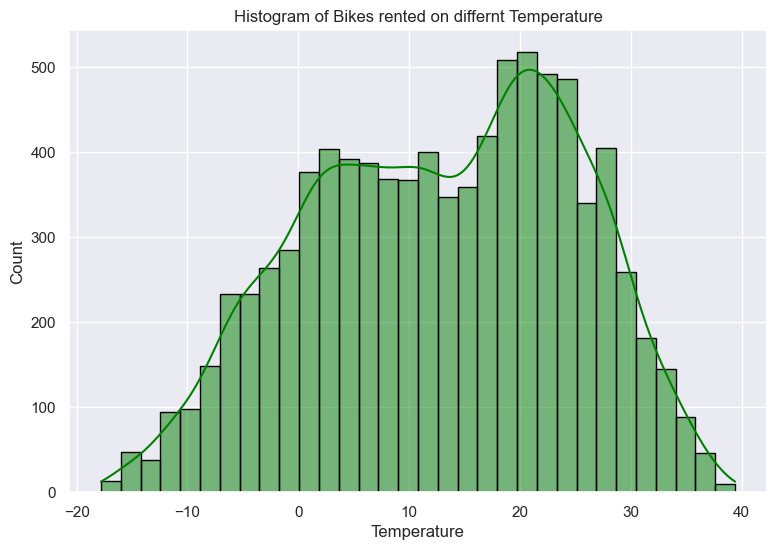

In [107]:
#Histogram for bikes rented on differnt temperature in the day
make_histplot(data,'Temperature')

If temperature is below 0 degrees and more than 30 degress folks dont prefer renting bikes.They perfere other public services for going to workplaces.


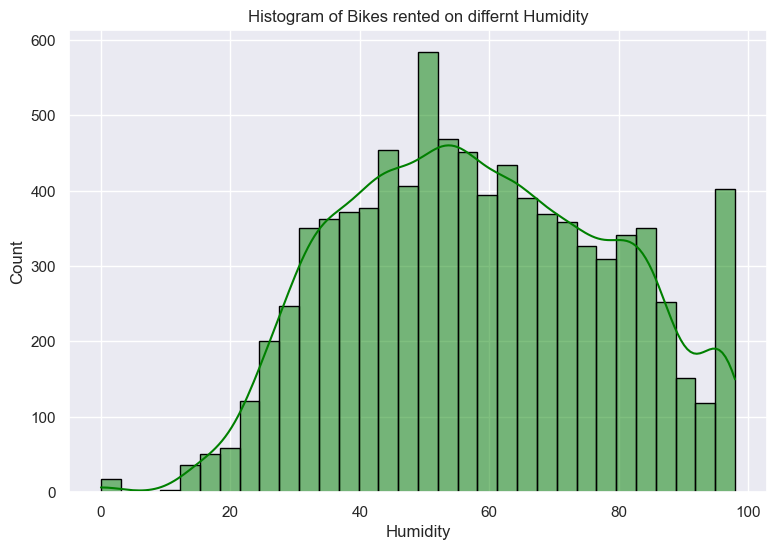

In [108]:
#Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Humidity')

Humidity between 25 to 85 is good with respect to bike demand.anyting other does not work in favor.

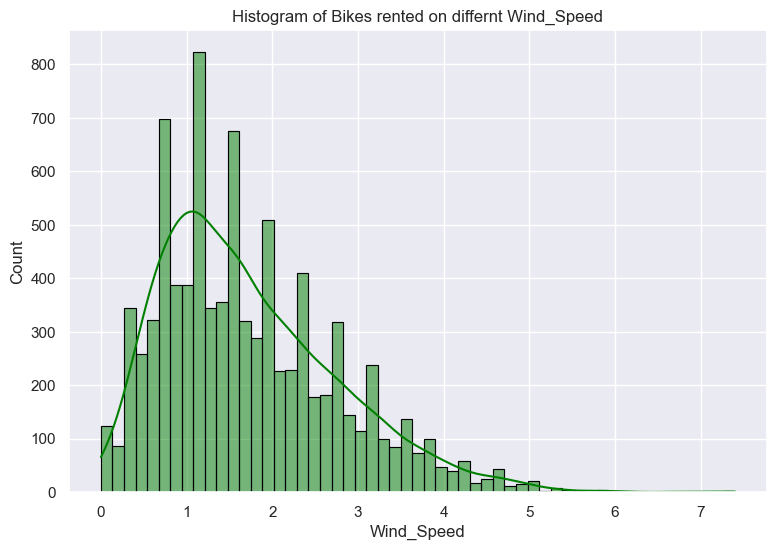

In [109]:
#Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Wind_Speed')

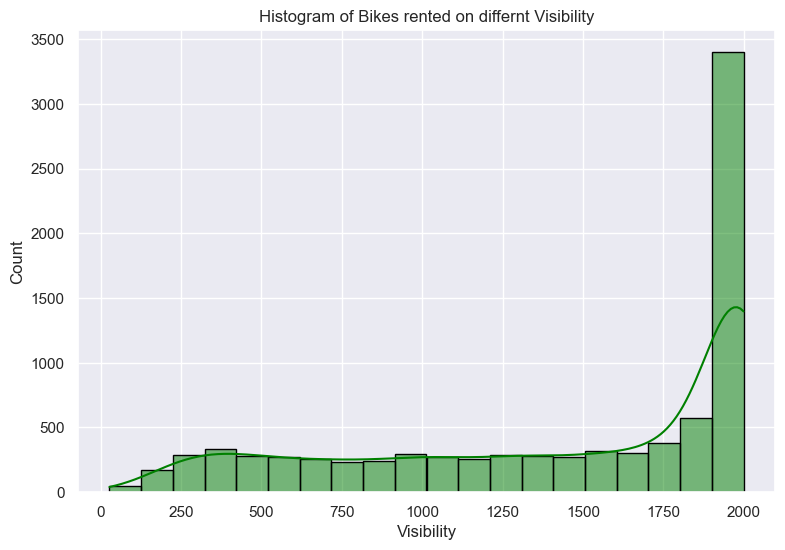

In [110]:
#Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Visibility')

Our data reveals a fascinating correlation between bike rental demand and prevailing visibility conditions. Notably, a marked inflection point emerges at 1800 meters of visibility. Above this threshold, demand surges dramatically, indicating a strong preference for cycling when weather conditions offer clear sightlines. Conversely, when visibility dips below 1800 meters, demand remains relatively stable, suggesting alternative transportation options hold sway in periods of reduced clarity.

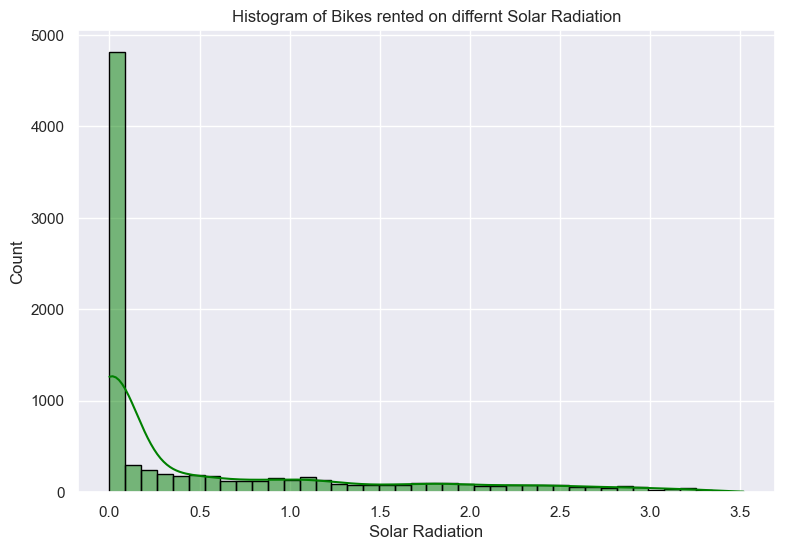

In [111]:
# Histogram for bikes rented on differnt temperature in the day
make_histplot(data,'Solar Radiation')

Our data unveils a captivating interplay between bike rental demand and solar radiation. Notably, a distinct tipping point emerges at 0.1 megajoules per square meter (MJ/m²) of solar radiation. Beyond this threshold, demand experiences a precipitous decline, suggesting a remarkable sensitivity to environmental conditions. This observation opens up intriguing avenues for strategic adaptation and market expansion.

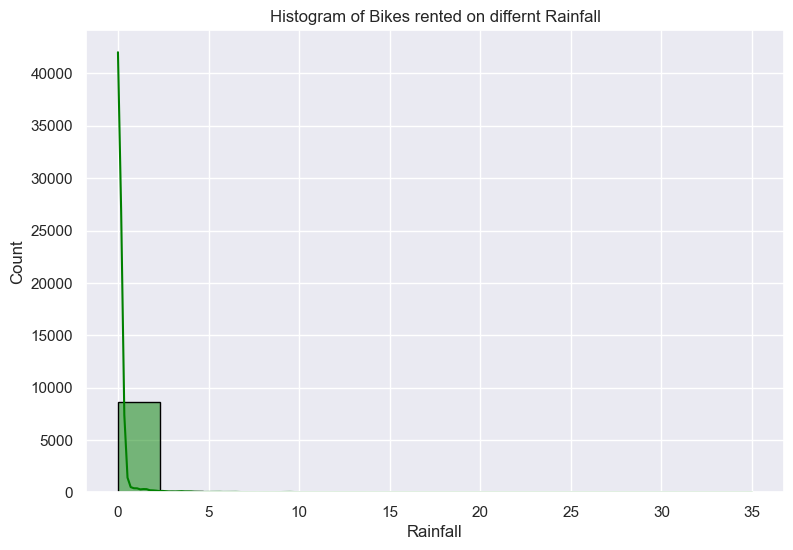

In [112]:
# Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Rainfall')


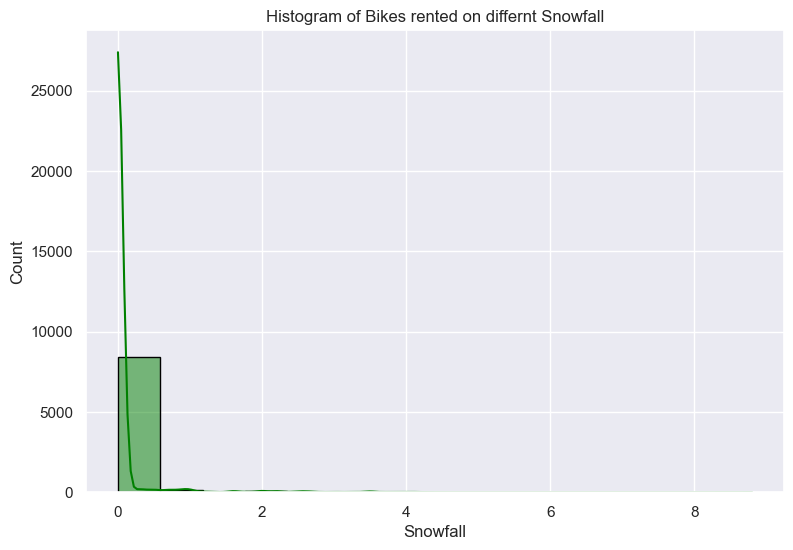

In [113]:
# Histogram for bikes rented on differnt temperature in the day

make_histplot(data,'Snowfall')


It is self-evident that the demand for rental bikes diminishes significantly in the presence of adverse weather conditions such as rainfall or snowfall. Our empirical data underscores the profound sensitivity of bike rental demand to environmental factors, including but not limited to rainfall, snowfall, and solar radiation.

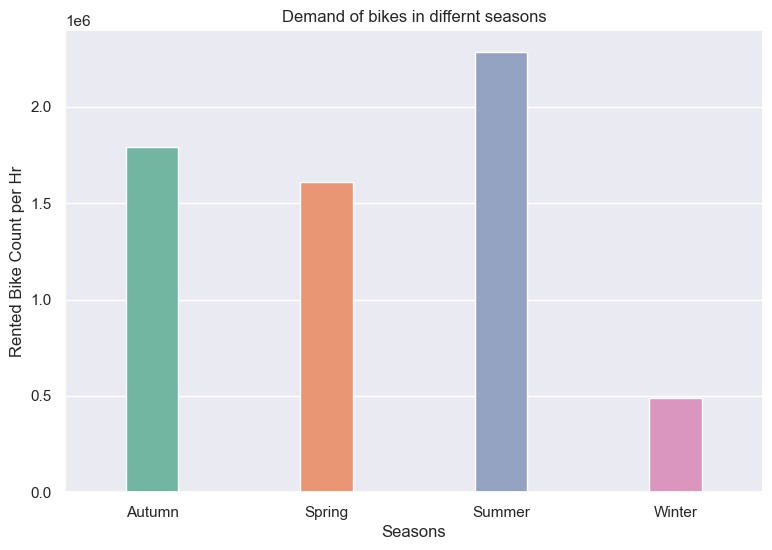

In [114]:
#Demand of bikes in differnt seasons

plt.figure(figsize = (9,6))

sns.barplot(x ='Seasons', y = 'Rented Bike Count per Hr',data = Bikes_Rented_on_different_Seasons,width=0.3)

plt.title('Demand of bikes in differnt seasons')

# show the plot
plt.show()

The zenith of bike demand materializes during the summer season, succeeded by autumn and spring in descending order of magnitude. Notably, the winter season witnesses a striking 80 percent reduction in bike demand when juxtaposed with the summertime peak.

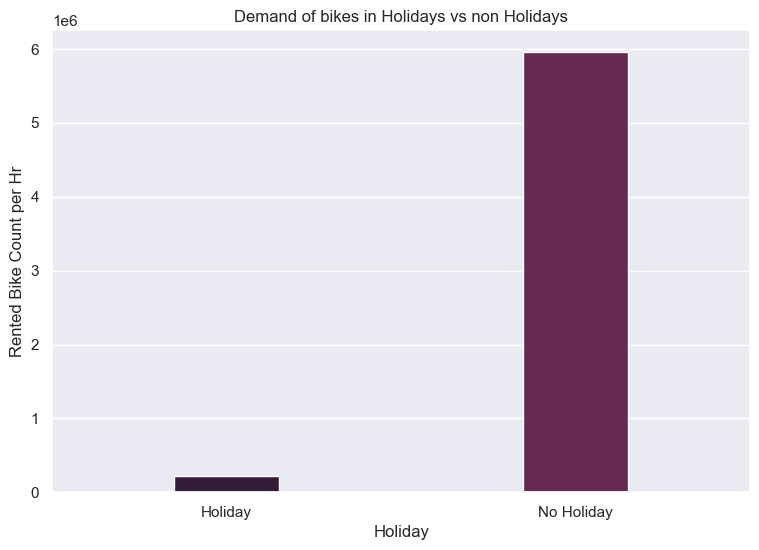

In [115]:
#Demand of bikes in Holidays vs non Holidays

plt.figure(figsize = (9,6))

palette=sns.color_palette("rocket")

sns.barplot(x ='Holiday', y = 'Rented Bike Count per Hr',data = Bikes_Rented_on_Holidays,width=0.3,palette=palette)

plt.title('Demand of bikes in Holidays vs non Holidays')

# show the plot
plt.show()

Relative to non-holiday periods, there exists a notably diminished demand for rental bikes during holiday periods.

In [116]:
data

,Rented Bike Count per Hr,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,30,2018


In [117]:
max_hrly_demand_per_season=data.groupby(['Seasons','Holiday']).sum('Rented Bike Count per Hr')
max_hrly_demand_per_season=max_hrly_demand_per_season.reset_index()
max_hrly_demand_per_season=max_hrly_demand_per_season.loc[:,['Seasons','Holiday','Rented Bike Count per Hr']]
max_hrly_demand_per_season


,Seasons,Holiday,Rented Bike Count per Hr
0,Autumn,Holiday,91018
1,Autumn,No Holiday,1698984
2,Spring,Holiday,45742
3,Spring,No Holiday,1566167
4,Summer,Holiday,49063
5,Summer,No Holiday,2234171
6,Winter,Holiday,30072
7,Winter,No Holiday,457097


In [118]:
df_sorted=max_hrly_demand_per_season.sort_values(by='Rented Bike Count per Hr',ascending=False)
df_sorted

,Seasons,Holiday,Rented Bike Count per Hr
5,Summer,No Holiday,2234171
1,Autumn,No Holiday,1698984
3,Spring,No Holiday,1566167
7,Winter,No Holiday,457097
0,Autumn,Holiday,91018
4,Summer,Holiday,49063
2,Spring,Holiday,45742
6,Winter,Holiday,30072


<Figure size 900x600 with 0 Axes>

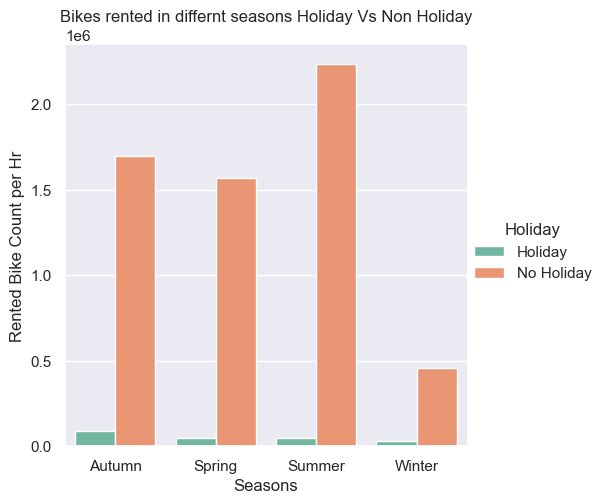

In [119]:
# Bikes rented in differnt seasons Holiday Vs Non Holiday

plt.figure(figsize = (9,6))

sns.catplot(data=max_hrly_demand_per_season,x='Seasons',y='Rented Bike Count per Hr',hue='Holiday',kind='bar')

plt.title('Bikes rented in differnt seasons Holiday Vs Non Holiday')

plt.show()

While the pinnacle of bike demand occurs during the summer in non-holiday seasons, during holiday periods, the demand for bikes ascends to its zenith in autumn, surpassing other seasons in magnitude.

In [120]:
X=data.iloc[:,2:]


In [121]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [122]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,187.663531
1,Humidity,187.133265
2,Wind_Speed,4.603728
3,Visibility,10.694657
4,Dew Point Temperature,126.713900
5,Solar Radiation,2.847789
6,Rainfall,1.100530
7,Snowfall,1.152891
8,Month,5.102383
9,Day,4.376979


In [123]:
for column in ['Hour','Dew Point Temperature','Humidity','Solar Radiation','Year','Month', 'Day']:
    if column not in data.columns:
        print(f"Column '{column}' not found in the DataFrame")
    else:
      print('Columns avilable in Dataframe')

Columns avilable in Dataframe
Columns avilable in Dataframe
Columns avilable in Dataframe
Columns avilable in Dataframe
Columns avilable in Dataframe
Columns avilable in Dataframe
Columns avilable in Dataframe


In [124]:
data=data.drop(['Dew Point Temperature','Humidity','Solar Radiation','Year','Seasons'],axis=1)

In [125]:
#Get dummies for columns Hour,Seasons,Holiday,Functioning Day
#data=pd.get_dummies(data=data,columns=['Hour','Month','Day',])

In [126]:
data

,Rented Bike Count per Hr,Hour,Temperature,Wind_Speed,Visibility,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Day
0,254,0,-5.2,2.2,2000,0.0,0.0,No Holiday,Yes,12,1
1,204,1,-5.5,0.8,2000,0.0,0.0,No Holiday,Yes,12,1
2,173,2,-6.0,1.0,2000,0.0,0.0,No Holiday,Yes,12,1
3,107,3,-6.2,0.9,2000,0.0,0.0,No Holiday,Yes,12,1
4,78,4,-6.0,2.3,2000,0.0,0.0,No Holiday,Yes,12,1
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,2.6,1894,0.0,0.0,No Holiday,Yes,11,30
8756,764,20,3.4,2.3,2000,0.0,0.0,No Holiday,Yes,11,30
8757,694,21,2.6,0.3,1968,0.0,0.0,No Holiday,Yes,11,30
8758,712,22,2.1,1.0,1859,0.0,0.0,No Holiday,Yes,11,30


In [127]:
data.columns

Index(['Rented Bike Count per Hr', 'Hour', 'Temperature', 'Wind_Speed',
       'Visibility', 'Rainfall', 'Snowfall', 'Holiday', 'Functioning_Day',
       'Month', 'Day'],
      dtype='object')

In [128]:
labelling_01 = {'No Holiday':1,'Holiday':0}
labelling_02={'Yes':1,'No':0}

# Replace values in the 'season' column using a lambda function
data['Holiday'] = data['Holiday'].apply(lambda x: labelling_01[x])
data['Functioning_Day'] = data['Functioning_Day'].apply(lambda x: labelling_02[x])
data

,Rented Bike Count per Hr,Hour,Temperature,Wind_Speed,Visibility,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Day
0,254,0,-5.2,2.2,2000,0.0,0.0,1,1,12,1
1,204,1,-5.5,0.8,2000,0.0,0.0,1,1,12,1
2,173,2,-6.0,1.0,2000,0.0,0.0,1,1,12,1
3,107,3,-6.2,0.9,2000,0.0,0.0,1,1,12,1
4,78,4,-6.0,2.3,2000,0.0,0.0,1,1,12,1
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,2.6,1894,0.0,0.0,1,1,11,30
8756,764,20,3.4,2.3,2000,0.0,0.0,1,1,11,30
8757,694,21,2.6,0.3,1968,0.0,0.0,1,1,11,30
8758,712,22,2.1,1.0,1859,0.0,0.0,1,1,11,30


In [129]:
data.columns

Index(['Rented Bike Count per Hr', 'Hour', 'Temperature', 'Wind_Speed',
       'Visibility', 'Rainfall', 'Snowfall', 'Holiday', 'Functioning_Day',
       'Month', 'Day'],
      dtype='object')

# Observation


<b>Peak Demand Hours: Bike demand exhibits a bimodal distribution, with a significant surge starting at 10:00 am and peaking at 6:00 pm (18 hours), emphasizing the importance of optimizing bike availability from 8:00 am to 11:00 pm (23 hours).

Weekly Patterns: Periodical dips every 6 days indicate lower bike demand on weekends compared to weekdays, suggesting a need for tailored strategies for different days of the week.

Seasonal Variation: Distinct seasonality in bike demand is observed, with the lowest utilization during winter (December-February) coinciding with the holiday season. Demand gradually recovers in March, reaching its peak from May to October.

Yearly Trends: A significant upswing in bicycle ridership is noted in 2018 compared to the sluggish demand experienced in 2017, with potential factors including cheaper bikes, government incentives, and increased gasoline prices.

Weekend Preferences: No demand for rental bikes on non-functioning days, as people prefer cars or public transport. Bikes are primarily used for commuting to workplaces.

Diversification Strategy: To cater to varied needs, consider offering diverse bike types (leisure bikes, cargo bikes) and flexible rental packages (multi-day passes, family plans). Collaborate with local attractions or businesses to promote bike rentals for leisure activities.

Temperature Sensitivity: Bike rental demand is influenced by temperature, with preferences against renting bikes below 0 degrees

# Data Modelling

In [130]:
#Splitting dataset in training and testing data

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0], test_size=0.33, random_state=42)

In [131]:
#Shape of testing and trainig data

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5869, 10), (5869,), (2891, 10), (2891,))

In [132]:
#Standardising features for similar scale

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)

x_test=scaler.transform(x_test)


print(x_train)
print("\n")
print(f"shape of trainig data is {x_train.shape}")
print("\n")
print('*'*80)
print("\n")
print(x_test)
print("\n")
print(f"shape of testing data is {x_test.shape}")

[[-1.23889183 -1.28690278  1.60949463 ...  0.18734194  1.59956393
   1.05581717]
 [ 1.52510454 -1.39618552  1.89975164 ...  0.18734194 -1.02216836
  -1.67185576]
 [-1.67531231  1.01644101 -1.19632309 ...  0.18734194  0.43434958
   0.71485806]
 ...
 [ 0.3613166   1.38632104  0.93222829 ...  0.18734194  0.14304599
  -0.30801929]
 [ 1.23415756 -1.37937279 -0.61580908 ...  0.18734194 -1.60477553
  -1.2172436 ]
 [ 1.52510454  0.52887189 -1.19632309 ...  0.18734194  0.72565317
   1.51042933]]


shape of trainig data is (5869, 10)


********************************************************************************


[[-0.51152436  1.19297466  0.06145727 ...  0.18734194  0.43434958
  -0.64897841]
 [ 0.07036961  1.64691833  0.35171427 ...  0.18734194  0.14304599
   0.48755198]
 [ 0.3613166   1.76460743 -0.51905674 ...  0.18734194  0.43434958
  -0.98993753]
 ...
 [-0.22057738  0.56249734 -0.61580908 ...  0.18734194 -0.14825759
  -0.19436625]
 [-1.38436532  0.3607446  -1.00281842 ... -5.33783311  0

In [133]:
#Finding correlation between Target and independent features

correlation_df=data.corr()
correlation_df=correlation_df['Rented Bike Count per Hr']
correlation_df=correlation_df.reset_index()
correlation_df=correlation_df.rename(columns={'index':'Column_names','Rented Bike Count per Hr':'Correlation'})
correlation_df

,Column_names,Correlation
0,Rented Bike Count per Hr,1.000000
1,Hour,0.410257
2,Temperature,0.538558
3,Wind_Speed,0.121108
4,Visibility,0.199280
5,Rainfall,-0.123074
6,Snowfall,-0.141804
7,Holiday,0.072338
8,Functioning_Day,0.203943
9,Month,0.133514


In [134]:
data.shape

(8760, 11)

In [135]:
def show_evaluation_metrics(y_test,y_pred):
        r_square=r2_score(y_test,y_pred)*100
        print(f'R square of model is {round(r_square,2)}')

        Adjusted_r_square=1 - (1-r_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
        print(f'Adjusted_r_square of model is {round(Adjusted_r_square,2)}')

        MAE=mean_absolute_error(y_test, y_pred)
        print(f'Mean Absolute Error of model is {round(MAE,2)}')

        MSE=mean_squared_error(y_test,y_pred)
        print(f'Mean Squared Error of model is {round(MSE,2)}')

        RMSE=MSE**0.5
        print(f'Root Mean Squared Error of model is {round(RMSE,2)}')

        accuracies = cross_val_score(estimator = linreg, X = x_train, y = y_train, cv =5)
        print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
        print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

        print("\n")

        pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
        print(pred_df[:10])

        print("\n")

        plt.figure(figsize = (9,6))
        sns.regplot(x=y_test,y=y_pred,scatter_kws={"color": "green"},line_kws={'color':'red'}, marker="x")
        plt.xlabel("y_test")
        plt.ylabel("y_predict")
        plt.title("Scatterplot of y_test vs y_predict")
        return plt.show()


In [136]:
def calc_adjusted_R2(y_test,y_pred):
    r_square=r2_score(y_test,y_pred)*100
    Adjusted_r_square=1 - (1-r_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    return Adjusted_r_square


# Multilinear Regression

In [137]:
#Multiple linear regression
linreg=LinearRegression()

#Fitting the model
linreg.fit(x_train,y_train)

#Prediciting bike rental duration
y_pred=linreg.predict(x_test)

R square of model is 48.48
Adjusted_r_square of model is 48.64
Mean Absolute Error of model is 340.57
Mean Squared Error of model is 213326.99
Root Mean Squared Error of model is 461.87
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728      1111.689524   616.310476
5556           822      1225.327376  -403.327376
5990           658      1436.489697  -778.489697
7674          2716      1130.825911  1585.174089
3319          1083       393.447257   689.552743
5761           636       862.093220  -226.093220
5972          1537      1548.525828   -11.525828
8758           712       907.985381  -195.985381
6079           425      1049.775044  -624.775044
7177           594       629.281431   -35.281431




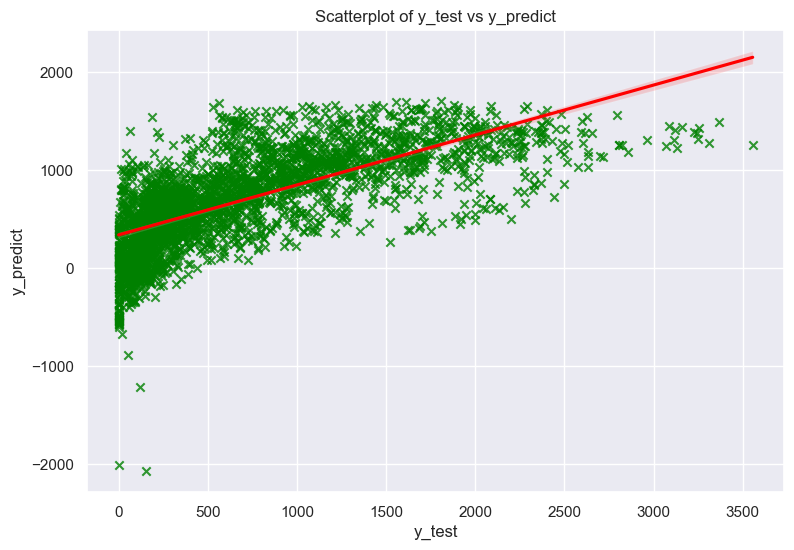

In [138]:
#Comparison of differtnt metrics for multilinear regressison
show_evaluation_metrics(y_test,y_pred)

In [139]:
#Calculate Adjusted R square for Multilinear Regression
multilinear_regression=calc_adjusted_R2(y_test,y_pred)
multilinear_regression

48.64047358587505

# Polynomial Regression

In [140]:
# Fitting Polynomial Regression to the dataset

poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()

#Transforming X train and  fitting new x train to linear regression model
model.fit(poly_reg.fit_transform(x_train),y_train)

#Predicting target variables
y_pred=model.predict(poly_reg.fit_transform(x_test))



R square of model is 52.32
Adjusted_r_square of model is 52.5
Mean Absolute Error of model is 290.23
Mean Squared Error of model is 197395.23
Root Mean Squared Error of model is 444.29
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728       923.750000   804.250000
5556           822      1116.875000  -294.875000
5990           658      1286.781250  -628.781250
7674          2716      1347.968750  1368.031250
3319          1083       602.828125   480.171875
5761           636       284.609375   351.390625
5972          1537      1783.375000  -246.375000
8758           712       779.640625   -67.640625
6079           425       785.671875  -360.671875
7177           594       495.828125    98.171875




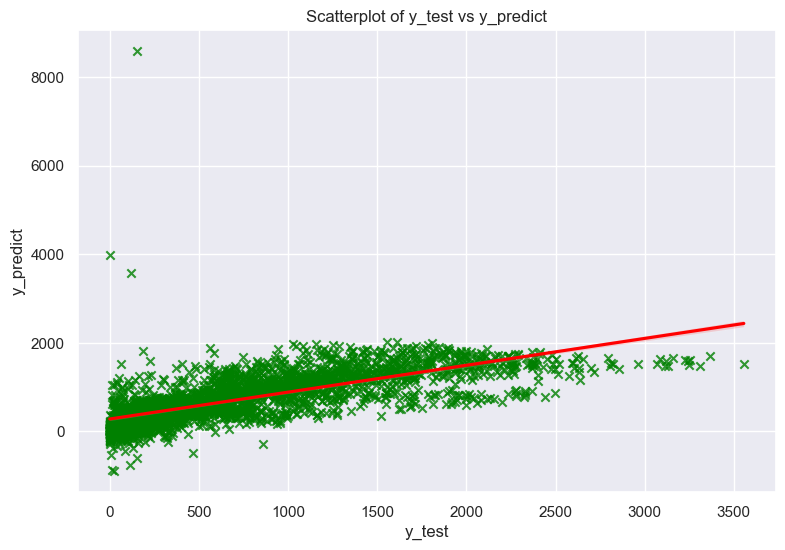

In [141]:
#Comparison of differtnt metrics for multilinear regressison
show_evaluation_metrics(y_test,y_pred)

In [142]:
#Calculate Adjusted R square for Ploynomial Regression
Polynomial_regression=calc_adjusted_R2(y_test,y_pred)
Polynomial_regression

52.50179625566458

# Ridge Regression

In [143]:
#Ridge Regression

#Hyperparameter tuning for choosing best parameters

param_grid={'alpha':[1.0,5.0,7.0,10.0,20.0,30.0],'solver':['auto','svd','lsqr','saga']}

ridge_regression_model=Ridge()

ridge_regression_model_grid=GridSearchCV(estimator=ridge_regression_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=10)

#Fitting model over training Data
ridge_regression_model_grid.fit(x_test,y_test)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0, 7.0, 10.0, 20.0, 30.0],
                         'solver': ['auto', 'svd', 'lsqr', 'saga']})

In [144]:
print("Best parameters are:",ridge_regression_model_grid.best_params_)

Best parameters are: {'alpha': 7.0, 'solver': 'saga'}


In [145]:
#Predicting target variables
y_pred=ridge_regression_model_grid.predict(x_test)
y_pred

array([1119.74341725, 1227.89053722, 1418.54761099, ...,  682.64137069,
        -99.71595393,  580.75140899])

R square of model is 48.92
Adjusted_r_square of model is 49.09
Mean Absolute Error of model is 338.36
Mean Squared Error of model is 211488.38
Root Mean Squared Error of model is 459.88
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728      1119.743417   608.256583
5556           822      1227.890537  -405.890537
5990           658      1418.547611  -760.547611
7674          2716      1095.481637  1620.518363
3319          1083       410.171622   672.828378
5761           636       908.822856  -272.822856
5972          1537      1510.695309    26.304691
8758           712       862.997147  -150.997147
6079           425      1057.154642  -632.154642
7177           594       669.604600   -75.604600




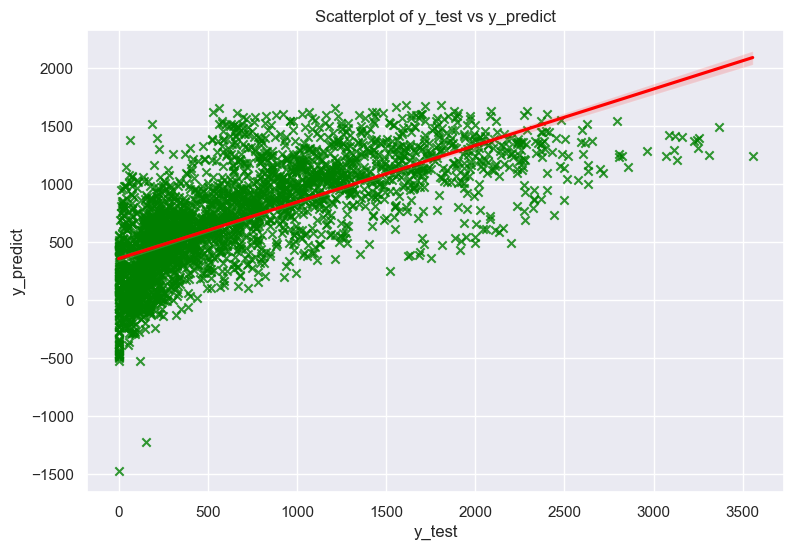

In [146]:
#Comparison of differtnt metrics for multilinear regressison
show_evaluation_metrics(y_test,y_pred)

In [147]:
#Calculate Adjusted R square for Ridge Regression
Ridge_regression=calc_adjusted_R2(y_test,y_pred)
Ridge_regression

49.08609177085248

# Lasso Regression

In [163]:
#Lasso Regression

#Hyperparameter tuning for choosing best parameters

param_grid={'alpha':[1.0,5.0,7.0,10.0,20.0,30.0],'random_state':[42],'max_iter':[2000]}

Lasso_regression_model=Lasso()

Lasso_regression_model_grid=GridSearchCV(estimator=Lasso_regression_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

#Fitting model over training Data
Lasso_regression_model_grid.fit(x_test,y_test)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 5.0, 7.0, 10.0, 20.0, 30.0],
                         'max_iter': [2000], 'random_state': [42]})

In [164]:
print("Best parameters are:",Lasso_regression_model_grid.best_params_)

Best parameters are: {'alpha': 1.0, 'max_iter': 2000, 'random_state': 42}


In [165]:
#Predicting target variables
y_pred=Lasso_regression_model_grid.predict(x_test)
y_pred

array([1119.13322104, 1227.17190691, 1419.12616575, ...,  684.50600457,
        -98.02611615,  581.13695852])

R square of model is 48.92
Adjusted_r_square of model is 49.08
Mean Absolute Error of model is 338.29
Mean Squared Error of model is 211496.33
Root Mean Squared Error of model is 459.89
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728      1119.133221   608.866779
5556           822      1227.171907  -405.171907
5990           658      1419.126166  -761.126166
7674          2716      1093.577821  1622.422179
3319          1083       410.830556   672.169444
5761           636       907.762410  -271.762410
5972          1537      1510.524655    26.475345
8758           712       858.707270  -146.707270
6079           425      1057.411047  -632.411047
7177           594       666.660062   -72.660062




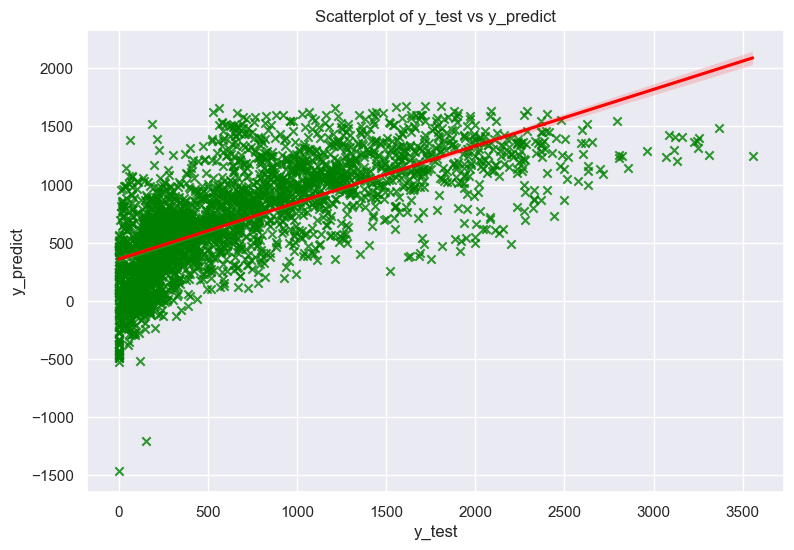

In [166]:
#Comparison of differtnt metrics for Lasso regressison
show_evaluation_metrics(y_test,y_pred)

In [167]:
#Calculate Adjusted R square for Lasso Regression
Lasso_regression=calc_adjusted_R2(y_test,y_pred)
Lasso_regression

49.084164489218196

# Elastic Net Model

In [148]:
#Elastic Net Model

elastic_net_model=ElasticNet()

param_grid={'alpha':[1.0,5.0,7.0,10.0,20.0,30.0],'random_state':[42],'max_iter':[2000],'l1_ratio':[0.3,0.5,0.7]}

#Fitting model over training Data

elastic_net_model_grid=GridSearchCV(estimator=elastic_net_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

elastic_net_model_grid.fit(x_test,y_test)

#Predicting target variables
y_pred=elastic_net_model_grid.predict(x_test)




R square of model is 46.78
Adjusted_r_square of model is 46.94
Mean Absolute Error of model is 344.96
Mean Squared Error of model is 220347.71
Root Mean Squared Error of model is 469.41
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728      1028.946703   699.053297
5556           822      1114.041901  -292.041901
5990           658      1261.368954  -603.368954
7674          2716      1022.102318  1693.897682
3319          1083       462.863347   620.136653
5761           636       848.991305  -212.991305
5972          1537      1344.071501   192.928499
8758           712       848.102668  -136.102668
6079           425       972.577164  -547.577164
7177           594       676.302653   -82.302653




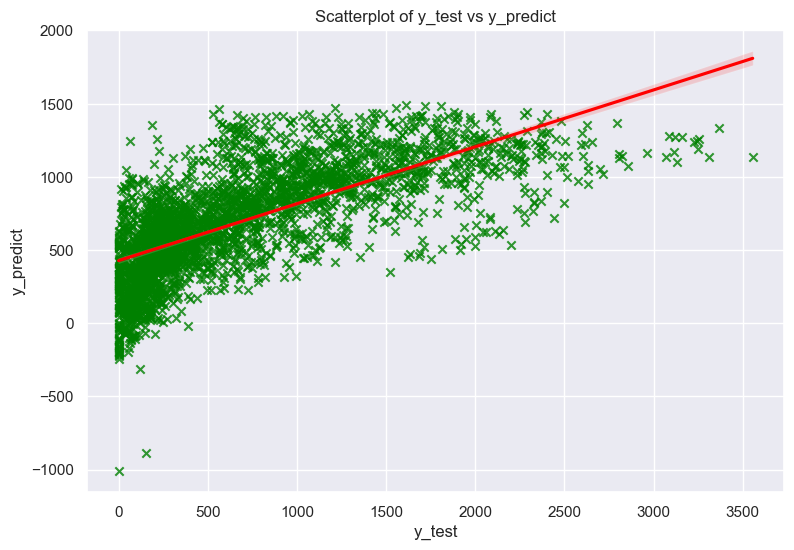

In [149]:
#Comparison of differtnt metrics for Lasso regressison
show_evaluation_metrics(y_test,y_pred)

In [150]:
#Calculate Adjusted R square for Elastic Net Regression
Elastic_net_regression=calc_adjusted_R2(y_test,y_pred)
Elastic_net_regression

46.93888948142091

# KNN

R square of model is 74.45
Adjusted_r_square of model is 74.71
Mean Absolute Error of model is 204.88
Mean Squared Error of model is 105774.07
Root Mean Squared Error of model is 325.23
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value  Difference
6056          1728           1001.6       726.4
5556           822            872.4       -50.4
5990           658            764.4      -106.4
7674          2716           1589.4      1126.6
3319          1083            458.2       624.8
5761           636            569.6        66.4
5972          1537           1561.0       -24.0
8758           712            745.8       -33.8
6079           425            417.4         7.6
7177           594            589.2         4.8




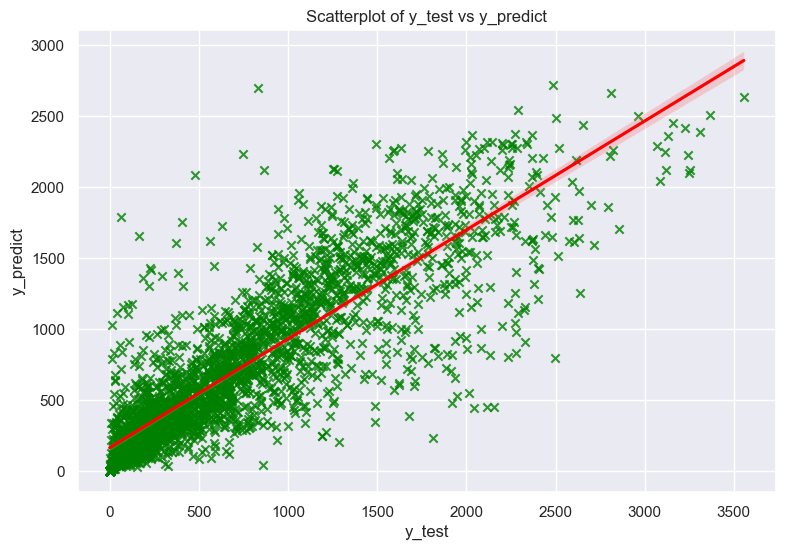

In [151]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fitting the model
knn_regressor.fit(x_train, y_train)

# Predicting target variables
y_pred_knn = knn_regressor.predict(x_test)

# Comparison of different metrics for KNN regression
show_evaluation_metrics(y_test, y_pred_knn)


In [152]:
from sklearn.metrics import r2_score

# Calculate R-squared for KNN regression
r_squared_knn = r2_score(y_test, y_pred_knn)

print("R-squared for KNN regression:", r_squared_knn)


R-squared for KNN regression: 0.744526339347557


# Support Vector Regressor (SVR)

R square of model is 31.21
Adjusted_r_square of model is 31.31
Mean Absolute Error of model is 359.26
Mean Squared Error of model is 284822.76
Root Mean Squared Error of model is 533.69
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728       791.526033   936.473967
5556           822       793.040034    28.959966
5990           658       856.923715  -198.923715
7674          2716       901.714163  1814.285837
3319          1083       413.671009   669.328991
5761           636       509.221413   126.778587
5972          1537       930.001660   606.998340
8758           712       597.605040   114.394960
6079           425       700.317085  -275.317085
7177           594       519.590148    74.409852




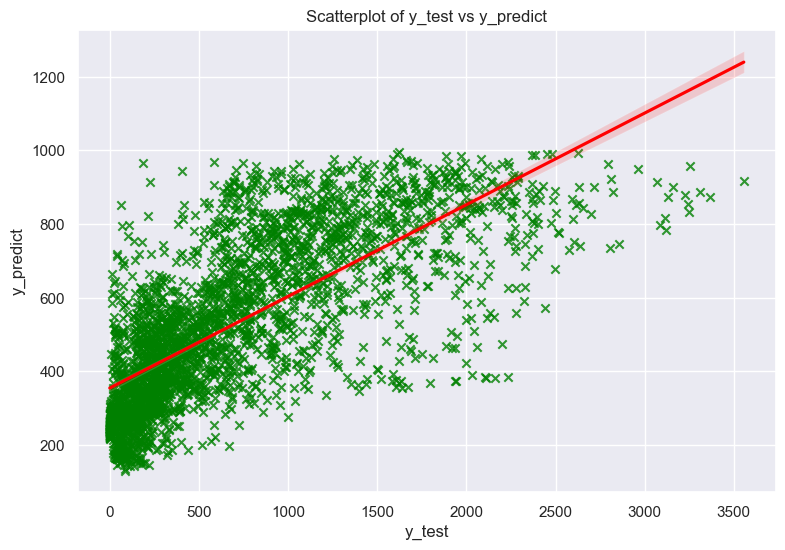

In [153]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Initialize the model
svr_regressor = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))  # You can adjust hyperparameters like C and epsilon

# Fitting the model
svr_regressor.fit(x_train, y_train)

# Predicting target variables
y_pred_svr = svr_regressor.predict(x_test)

# Comparison of different metrics for SVR regression
show_evaluation_metrics(y_test, y_pred_svr)


In [154]:
from sklearn.metrics import r2_score

# Calculate R-squared for SVR regression
r_squared_svr = r2_score(y_test, y_pred_svr)

print("R-squared for SVR regression:", r_squared_svr)


R-squared for SVR regression: 0.312074219718955


# Dual-form SVR and different kernel functions

R square of model is 66.24
Adjusted_r_square of model is 66.46
Mean Absolute Error of model is 230.95
Mean Squared Error of model is 139790.77
Root Mean Squared Error of model is 373.89
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728       725.346554  1002.653446
5556           822       880.952465   -58.952465
5990           658      1016.830323  -358.830323
7674          2716      1551.343693  1164.656307
3319          1083       357.655978   725.344022
5761           636       455.954587   180.045413
5972          1537      1693.430922  -156.430922
8758           712       642.868420    69.131580
6079           425       632.982110  -207.982110
7177           594       509.256066    84.743934




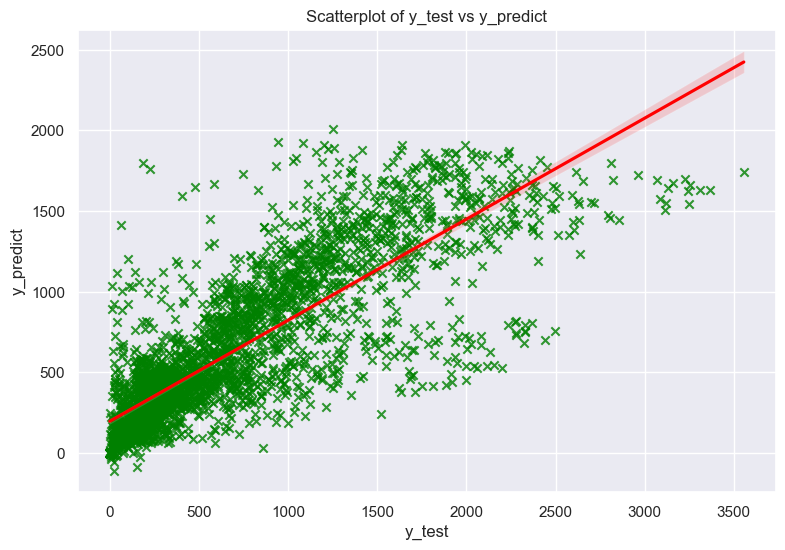

In [155]:
# Example with RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Fitting the model
svr_rbf.fit(x_train, y_train)

# Predicting target variables
y_pred_svr_rbf = svr_rbf.predict(x_test)

# Comparison of different metrics for SVR with RBF kernel
show_evaluation_metrics(y_test, y_pred_svr_rbf)

# You can similarly try 'linear', 'poly', and other kernels


In [156]:
from sklearn.metrics import r2_score

# Calculate R-squared for SVR with different kernel functions
# Assuming you have already fitted SVR models with different kernels like 'linear', 'poly', 'rbf', etc.

# For example, let's assume you have an SVR model with RBF kernel
r_squared_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
print("R-squared for SVR with RBF kernel:", r_squared_svr_rbf)

# You can similarly calculate R-squared for SVR with other kernel functions like 'linear', 'poly', etc.


R-squared for SVR with RBF kernel: 0.6623665957297302


# Decision Tree Regressor

R square of model is 68.71
Adjusted_r_square of model is 68.95
Mean Absolute Error of model is 202.32
Mean Squared Error of model is 129539.82
Root Mean Squared Error of model is 359.92
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value  Difference
6056          1728           1695.0        33.0
5556           822            762.0        60.0
5990           658            629.0        29.0
7674          2716           1695.0      1021.0
3319          1083            728.0       355.0
5761           636            945.0      -309.0
5972          1537           1387.0       150.0
8758           712            554.0       158.0
6079           425           1059.0      -634.0
7177           594            880.0      -286.0




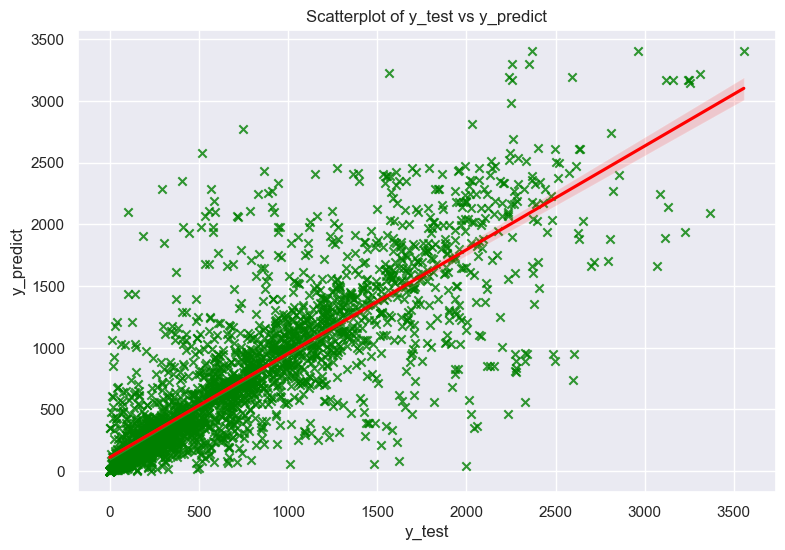

In [157]:
#Decision Tree

dt_model=DecisionTreeRegressor()

dt_model_grid=GridSearchCV(estimator=dt_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

#Fitting model over training Data
dt_model.fit(x_train,y_train)

y_pred=dt_model.predict(x_test)

#Comparison of differtnt metrics for evaluation
show_evaluation_metrics(y_test,y_pred)

In [158]:
#Calculate Adjusted R square for Decision Tree Regression
DT_regression=calc_adjusted_R2(y_test,y_pred)
DT_regression

68.94766207648283

# XgBoost

R square of model is 80.85
Adjusted_r_square of model is 81.13
Mean Absolute Error of model is 180.88
Mean Squared Error of model is 79292.96
Root Mean Squared Error of model is 281.59
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728      1194.557729   533.442271
5556           822       728.888020    93.111980
5990           658       670.117101   -12.117101
7674          2716      1685.834054  1030.165946
3319          1083       595.389753   487.610247
5761           636       663.445081   -27.445081
5972          1537      1742.062223  -205.062223
8758           712       619.767707    92.232293
6079           425       916.130018  -491.130018
7177           594       544.580342    49.419658




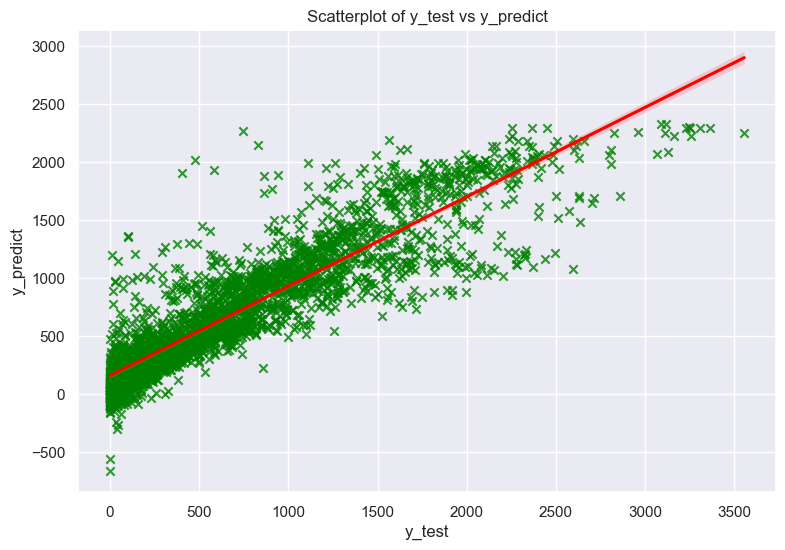

In [159]:
#Xgboost
xgboost_regressor = GradientBoostingRegressor()

#Hyperparameter tuning for medil training
xgboost_regressor_grid=GridSearchCV(estimator=xgboost_regressor,param_grid=param_grid,n_jobs=-1,cv=5)

xgboost_regressor.fit(x_train,y_train)

y_pred=xgboost_regressor.predict(x_test)

#Comparison of differtnt metrics for evaluation
show_evaluation_metrics(y_test,y_pred)

In [160]:
#Calculate Adjusted R square for Xgboost Regression
XgBoost_regression=calc_adjusted_R2(y_test,y_pred)
XgBoost_regression

81.12580861044452

In [168]:
#Making dictionary of Regression models and their respective Adjusted R square
Model_selection={'KNN':r_squared_knn,'Decision Tree': DT_regression,'XgBoost':XgBoost_regression,
                'SVR':r_squared_svr,'Multilinear':multilinear_regression,'Polynomial':Polynomial_regression,
                 'Ridge Regression':Ridge_regression,'Lasso Regression':Lasso_regression,'Elastic Net Regression':Elastic_net_regression, 'Dual form SVR':r_squared_svr_rbf
                }

# Model Selection


In [169]:
Model_selection

{'KNN': 0.744526339347557,
 'Decision Tree': 68.94766207648283,
 'XgBoost': 81.12580861044452,
 'SVR': 0.312074219718955,
 'Multilinear': 48.64047358587505,
 'Polynomial': 52.50179625566458,
 'Ridge Regression': 49.08609177085248,
 'Lasso Regression': 49.084164489218196,
 'Elastic Net Regression': 46.93888948142091,
 'Dual form SVR': 0.6623665957297302}

In [170]:
#Round off value to 2 decimal
Model_selection_dict={key:round(value,2) for key,value in Model_selection.items()}

In [171]:
#Making Datframe from Dictionary
Model_selection_df=pd.DataFrame([Model_selection_dict])

#Renaming column and sorting in descending order
Model_selection_df_transposed=Model_selection_df.transpose()
Model_selection_df_transposed.rename(columns={0:'Adjusted R-Square'},inplace=True)
Model_selection_df=Model_selection_df_transposed.sort_values(by=['Adjusted R-Square'],ascending=False).reset_index()
Model_selection_df=Model_selection_df.rename({'index':'Model Name'},axis=1)
Model_selection_df

,Model Name,Adjusted R-Square
0,XgBoost,81.13
1,Decision Tree,68.95
2,Polynomial,52.50
3,Ridge Regression,49.09
4,Lasso Regression,49.08
5,Multilinear,48.64
6,Elastic Net Regression,46.94
7,KNN,0.74
8,Dual form SVR,0.66
9,SVR,0.31


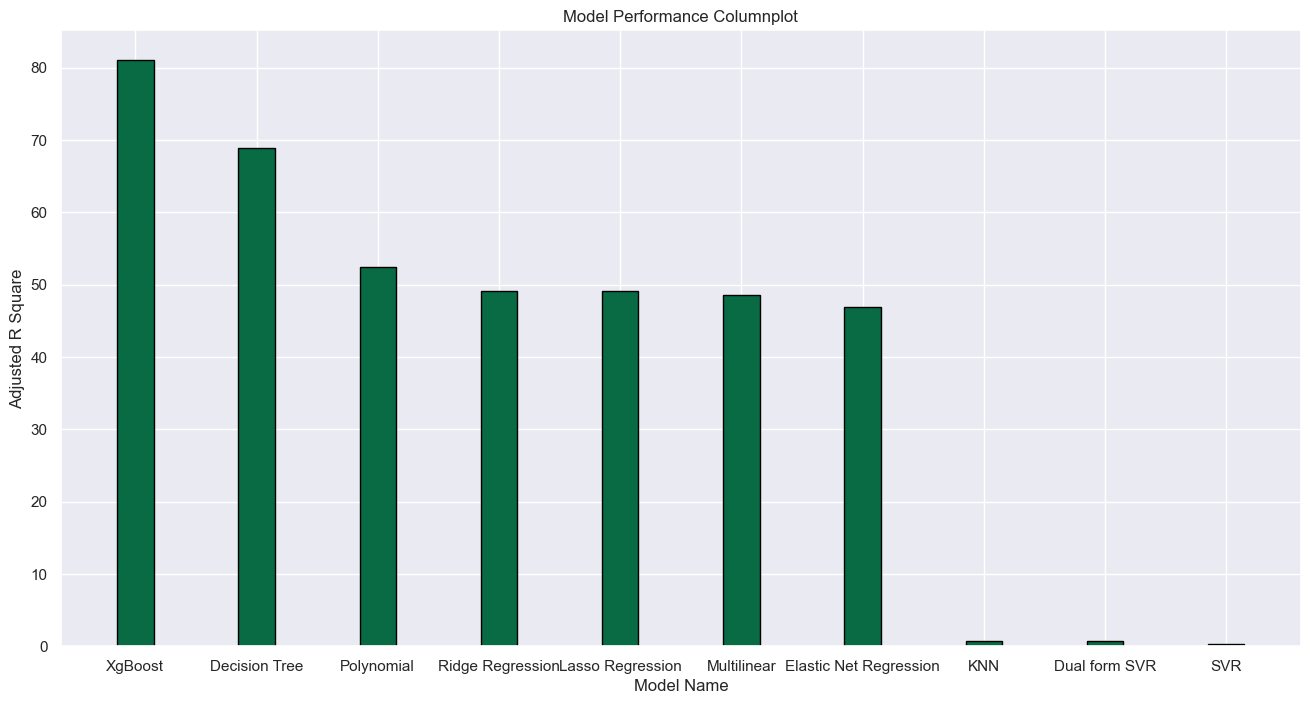

In [172]:
plt.figure(figsize = (16,8))
plt.bar(Model_selection_df['Model Name'],Model_selection_df['Adjusted R-Square'],color='#086b43',edgecolor='black',width=0.3)



# add labels and title
plt.xlabel('Model Name')
plt.ylabel('Adjusted R Square')
plt.title('Model Performance Columnplot')

plt.show()

<b>Numerous performance metrics, such as R Square, Adjusted R Square, Mean Squared Error, and Root Mean Squared Error, are available for assessing the efficacy of regression models.

The choice of the metric should be determined through comprehensive discussions with domain experts. In this instance, the model's predictive performance is evaluated using Adjusted R Square. It is noteworthy that alternative metrics can also be applied to appraise the model.

It is observed that the XGBoost Regressor yields the highest Adjusted R Square value among the models considered. Consequently, the recommendation is to employ XGBoost Regression for predicting rental bike demand based on

R square of model is 80.85
Adjusted_r_square of model is 81.13
Mean Absolute Error of model is 180.88
Mean Squared Error of model is 79292.96
Root Mean Squared Error of model is 281.59
Cross Val Accuracy: 51.51 %
Cross Val Standard Deviation: 1.29 %


      Actual Value  Predicted Value   Difference
6056          1728      1194.557729   533.442271
5556           822       728.888020    93.111980
5990           658       670.117101   -12.117101
7674          2716      1685.834054  1030.165946
3319          1083       595.389753   487.610247
5761           636       663.445081   -27.445081
5972          1537      1742.062223  -205.062223
8758           712       619.767707    92.232293
6079           425       916.130018  -491.130018
7177           594       544.580342    49.419658




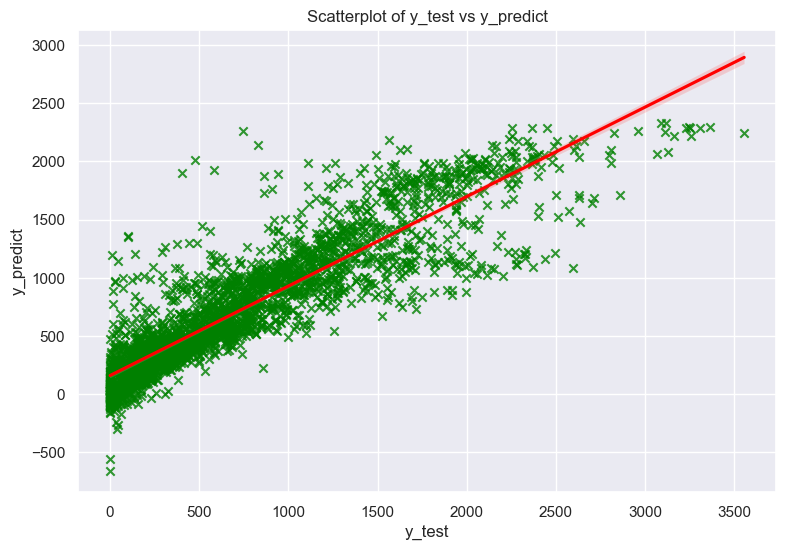

In [173]:
#Xgboost
xgboost_regressor = GradientBoostingRegressor()

#Hyperparameter tuning for medil training
xgboost_regressor_grid=GridSearchCV(estimator=xgboost_regressor,param_grid=param_grid,n_jobs=-1,cv=5)

xgboost_regressor.fit(x_train,y_train)

y_pred=xgboost_regressor.predict(x_test)

#Comparison of differtnt metrics for evaluation
show_evaluation_metrics(y_test,y_pred)

In [184]:
import joblib

# Save the model using joblib
joblib.dump(xgboost_regressor, r"C:\Users\arsha\OneDrive\Desktop\bike_sharing_predication\xgboost_regressor.pkl")


['C:\\Users\\arsha\\OneDrive\\Desktop\\bike_sharing_predication\\xgboost_regressor.pkl']

In [185]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5869, 10), (5869,), (2891, 10), (2891,))

In [186]:
data.columns


Index(['Rented Bike Count per Hr', 'Hour', 'Temperature', 'Wind_Speed',
       'Visibility', 'Rainfall', 'Snowfall', 'Holiday', 'Functioning_Day',
       'Month', 'Day'],
      dtype='object')

In [187]:
new_data=np.array([[11,5.3,1.8,1177,0,0,1,1,11,30]])
model=xgboost_regressor
new_data_scaled = scaler.transform(new_data)

# Make predictions using the model
predictions = model.predict(new_data_scaled)
predictions=int(predictions)
predictions

C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


681